<a href="https://colab.research.google.com/github/JoanNjoki/JoanNjoki/blob/main/Moringa_Data_Science_Prep_W3_Independent_Project_2021_03_Joan_Mwangi_DataReport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                  AUTOLIB DATA ANALYSIS



> Autolib is an electric car sharing service based in Paris that uses Bluecars as its public transport and payment is done by subscription. 

>The purpose of the analysis will be to identify the popular hour for Bluecars in the month of April 2018.











######**Using the following links for further analysis** :


1.  [Autolib dataset description](https://drive.google.com/file/d/)
2.   [Autolib Dataset](http://bit.ly/autolib_dataset)




##1.0 Importing libraries into the environment

In [4]:
#importing libraries into the environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
% matplotlib inline 
import seaborn as sns

In [5]:
#loading the dataset into the environment and previewing the first 10 rows
df = pd.read_csv('/content/Autolib_dataset .csv')
df

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃ©nelotte,2,2,0,0,0,nonexistent,Colombes,NaN,colombes-menelotte-8,STATION,"48.9246525, 2.259313",92700,Colombes/MÃ©nelotte/8,operational,NaN,3,station,ok,nonexistent,2018,4,6,11,26
4996,37 rue de Dantzig,4,4,0,0,1,operational,Paris,NaN,paris-dantzig-37,STATION,"48.8335103, 2.2987201",75015,Paris/Dantzig/37,operational,NaN,2,station,ok,nonexistent,2018,4,4,16,56
4997,142 rue du Bac,1,1,0,0,1,operational,Paris,NaN,paris-bac-142,STATION,"48.8508194, 2.3237968",75007,Paris/Bac/142,operational,NaN,4,station,ok,nonexistent,2018,4,1,7,1
4998,2 avenue du Val de Fontenay,2,2,0,0,0,nonexistent,Fontenay-Sous-Bois,NaN,fontenaysousbois-valdefontenay-2,STATION,"48.8528247, 2.4869085",94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,NaN,3,station,ok,nonexistent,2018,4,4,17,27


##1.1 Data Cleaning

### 1.1.1 Validity

In [6]:
#Data cleaning action:dropping the displayed comment column
#Explanation:not necessary for the data analysis
df = df.drop('Displayed comment', axis = 1)
df.head(1)

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43


In [7]:
#Data cleaning action:dropping the Geo point column
#Explanation:not necessary for the data analysis
df = df.drop('Geo point', axis = 1)
df.head(1)

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43


In [8]:
#Data cleaning action:dropping the Cars column
#Explanation:the values in the cars column are similar to bluecar
df1 = df.drop('Cars', axis = 1)
df1.head(1)

,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43


In [9]:
#Data cleaning action:dropping the 'Scheduled at' column
#Explanation:the values in the cars column are similar to bluecar
df1 = df1.drop('Scheduled at', axis = 1)
df1.head(1)

,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,75015,Paris/Suffren/2,operational,2,station,ok,nonexistent,2018,4,8,11,43


###1.1.2 Accuracy

In [10]:
#Data cleaning action:checking if the datatypes of the datasets are correct
#Explanation:if the datatype match with the description of the columns, data analysis can be done
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Bluecar counter      5000 non-null   int64 
 2   Utilib counter       5000 non-null   int64 
 3   Utilib 1.4 counter   5000 non-null   int64 
 4   Charge Slots         5000 non-null   int64 
 5   Charging Status      5000 non-null   object
 6   City                 5000 non-null   object
 7   ID                   5000 non-null   object
 8   Kind                 5000 non-null   object
 9   Postal code          5000 non-null   int64 
 10  Public name          5000 non-null   object
 11  Rental status        5000 non-null   object
 12  Slots                5000 non-null   int64 
 13  Station type         5000 non-null   object
 14  Status               5000 non-null   object
 15  Subscription status  5000 non-null   object
 16  year  

In [11]:
#Data cleaning action: checking for typos in charging status and rectifying them
#Explanation:for easy grouping of data that share attributes
df1['Charging Status'].unique().tolist()

['nonexistent', 'operational', 'broken']

In [12]:
#Data cleaning action: checking for typos in day and rectifying them
#Explanation:for easy grouping of data that share attributes
df1['day'].unique().tolist()

[8, 6, 3, 4, 2, 1, 5, 9, 7]

In [14]:
#Data cleaning action: checking for typos in 'checking status' and rectifying them
#Explanation:for easy grouping of data that share attributes
df1['Rental status'].unique().tolist()

['operational', 'broken', 'future', 'nonexistent']

###1.1.3 Completeness

In [17]:
#Data cleaning action: checking for null and rectifying them
#Explanation:to check for null values that will affect analysis
df1.isnull().sum()

Address                0
Bluecar counter        0
Utilib counter         0
Utilib 1.4 counter     0
Charge Slots           0
Charging Status        0
City                   0
ID                     0
Kind                   0
Postal code            0
Public name            0
Rental status          0
Slots                  0
Station type           0
Status                 0
Subscription status    0
year                   0
month                  0
day                    0
hour                   0
minute                 0
dtype: int64

###1.1.4 Consistency

In [63]:
#Data cleaning action: checking for null and rectifying them
#Explanation:to check for null values that will affect analysis
df1.duplicated().sum()

0

###1.1.5 Uniformity

In [18]:
#Data cleaning action: lowering case for column names and add '_' in all columns for uniformity
#Explanation:uniform column for easy reference
df1.columns = df1.columns.str.lower().str.replace(' ','_')
df1.head(1)

,address,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,charging_status,city,id,kind,postal_code,public_name,rental_status,slots,station_type,status,subscription_status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,75015,Paris/Suffren/2,operational,2,station,ok,nonexistent,2018,4,8,11,43


In [19]:
#checking the shape of the data
print(df.shape)

(5000, 23)


###1.1.6 dealing with outliers

In [21]:
#Action: removing outliers in the dataset 
 
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
df3 = df1[~((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df1.shape)
print(df3.shape)

(5000, 21)
(3317, 21)


###1.1.6 Exporting csv file

In [22]:
#Data cleaning action: exporting csv file

df1.to_csv("new_autolib.csv")


## 1.2 Data Analysis

1.2.1 popular hour for picking an electric bluecar over the month of April

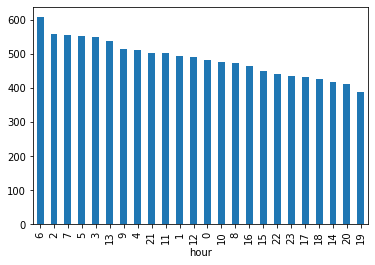

In [23]:
#visualizing the popular hour using matplotlib for the month of April 2018
df1.groupby('hour')['bluecar_counter'].sum().sort_values(ascending=False).plot(kind='bar')

###### 1.2.2 Popular hour for returning cars

In [30]:
#creating a new column named carsum
#which will be the sum of autolib, autolib 1.4 and blue cars
df1['carsum'] = df1['bluecar_counter']+	df1['utilib_counter']+df1['utilib_1.4_counter']
df1['carsum'] 

0       0
1       6
2       5
3       4
4       3
       ..
4995    2
4996    4
4997    1
4998    2
4999    4
Name: carsum, Length: 5000, dtype: int64

In [86]:
df1.groupby('hour')['carsum'].sum().sort_values(ascending=False).head(1)

hour
6    654
Name: carsum, dtype: int64

In [60]:
df1.groupby('hour')['Utilib counter'].sum().sort_values(ascending=False).head(1)

hour
8    19
Name: Utilib counter, dtype: int64

In [63]:
df1.groupby('hour')['Utilib 1.4 counter'].sum().sort_values(ascending=False).head(1)

hour
3    36
Name: Utilib 1.4 counter, dtype: int64

In [89]:
df1.groupby('hour')['bluecar_counter'].sum().sort_values(ascending=False).head(1)

hour
6    608
Name: bluecar_counter, dtype: int64

###### 2.2.2 Popular station

-----Popular station for bluecars

In [87]:
#using the sum of cars and grouping by public name to identify the popular station 
a = df1.groupby('public_name')['bluecar_counter'].sum().nlargest(1)
a

public_name
Fontenay-aux-Roses/Robert Marchand/32    50
Name: bluecar_counter, dtype: int64

-----Popular station overall

In [88]:
#identifying the popular station overall
a = df1.groupby('public_name')['carsum'].sum().nlargest(1)
n.head(1)

Paris/Porte de Montrouge/8    13
Name: public_name, dtype: int64

------Popular station at the most popular hour

In [90]:
#using bluecar_counter column we get to identify the popular hour
b = df1.groupby('hour')['bluecar_counter'].sum().nsmallest(1)
b

hour
19    387
Name: bluecar_counter, dtype: int64

In [97]:
#having identified it was hour 6 which was the popular hour
# I then group by public name to identify the stations which are popular at the popular hour
y = df1.loc[(df1['hour'] == 6)& df1['public_name']]
t = y.loc[y['bluecar_counter'] == 0].groupby('public_name').head(1)
t['public_name']

87                             Paris/Victoria/17
97                                Paris/IÃ©na/24
132                           Paris/Crozatier/33
207                        Paris/RÃ©publique/128
399                           Paris/Malakoff/115
571                            Paris/Henri IV/46
602                       Paris/Saint-Martin/204
650                              Paris/Clovis/20
657               Paris/Notre-Dame des Champs/39
676                               Paris/Sibour/2
953                         Paris/Batignolles/92
1302                      Paris/Ledru Rollin/104
1305                     Paris/Saint-HonorÃ©/123
1354                  Paris/Saint-Martin/Parking
1459                            Paris/Tolbiac/15
1749                             Paris/Artois/11
2044          Issy-les-Moulineaux/Stalingrad/127
2084              Guyancourt/Philibert Delorme/9
2235                      Paris/Chateaubriand/19
2716               Paris/Saint-Jacques 1/Parking
2776           Paris

In [98]:
#What station is the most popular for picking up Blue cars?
c = df1.groupby('public_name')['bluecar_counter'].sum().nsmallest(1)
c

public_name
Alfortville/Blanqui/61    0
Name: bluecar_counter, dtype: int64

-----Popular postal code 

In [71]:
#What postal code is the most popular for picking up Blue cars?
c = df1.groupby('postal_code')['bluecar_counter'].sum().nlargest(1)
c

postal_code
75015    609
Name: bluecar_counter, dtype: int64

In [99]:
#Does the popular station belong to the popular postal code
df1.loc[(df1['postal_code'] == 75015) & (df1['public_name']=='Paris/Porte de Montrouge/8')]

,address,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,charging_status,city,id,kind,postal_code,public_name,rental_status,slots,station_type,status,subscription_status,year,month,day,hour,minute,carsum


In [95]:
#popular postal code overall
df1.groupby('postal_code')['carsum'].sum().nlargest(1)

postal_code
75015    663
Name: carsum, dtype: int64

In [101]:
#postal code at the most popular hour
y = df1[['postal_code','hour']]
print(y[y['hour']==6])

      postal_code  hour
20          75014     6
74          92380     6
81          75012     6
87          75001     6
92          94800     6
...           ...   ...
4917        75020     6
4941        94500     6
4951        75001     6
4964        75015     6
4987        92100     6

[219 rows x 2 columns]


In [104]:
#Do the results change if you consider Utilib and Utilib 1.4 instead of Blue cars?
#updating the dataframe with a new column utilib 
df1['utilib'] = df1['utilib_counter'] +df1['utilib_1.4_counter']
df1['utilib']


0       0
1       0
2       2
3       1
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: utilib, Length: 5000, dtype: int64

----Comparing results of the blue car with that of Utilib and Utilib 1.4

In [106]:
#checking if the sum of the (utilib and utilib 1.4) will change for the most popular hour
df1.groupby('hour')['utilib'].sum().nlargest(1)

hour
3    51
Name: utilib, dtype: int64

In [107]:
df1.groupby('postal_code')['utilib'].sum().nlargest(1)

postal_code
75017    60
Name: utilib, dtype: int64

In [108]:
df1.groupby('public_name')['utilib'].sum().nlargest(1)

public_name
SÃ¨vres/Grande Rue/123    12
Name: utilib, dtype: int64

##Recommendations



*   According to our analysis the demand for picking bluecars peaks at 19:00hrs which is different for the combination of utilib and utilib 1.4 at 3am. 
*   Popular station is Fontenay-aux-Roses/Robert Marchand/32 for bluecars and SÃ¨vres/Grande Rue/123 for both utilib and utilib 1.4
*   Finally, the most popular postal code used by bluecars is 75015 which is different for utilib and utilib 1.4 which is 75017






